In [67]:
import pandas as pd
import numpy as np

In [68]:
df=pd.read_csv('newplacementdata - newplacementdata (1).csv')

In [69]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='placement_exam_marks'>

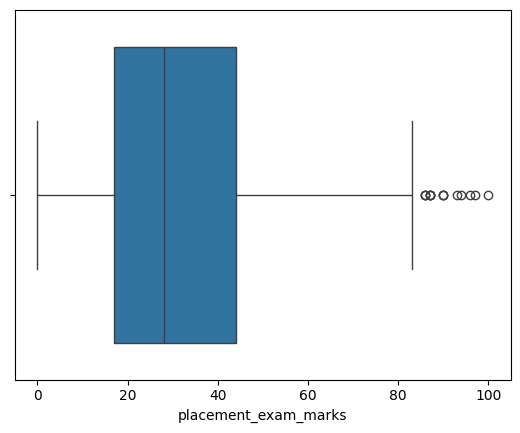

In [72]:

sns.boxplot(x=df['placement_exam_marks'])


In [73]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [74]:
df.shape

(1000, 3)

In [75]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [76]:
percentile75

np.float64(44.0)

In [77]:
IQR=percentile75-percentile25

In [78]:
IQR

np.float64(27.0)

In [79]:
highestlimit=percentile75+1.5*IQR
lowestlimit=percentile25-1.5*IQR

In [80]:
highestlimit

np.float64(84.5)

In [81]:
lowestlimit

np.float64(-23.5)

In [82]:
#trimming
df[df['placement_exam_marks']>highestlimit].shape

(15, 3)

In [83]:
#trimming
new_df=df[df['placement_exam_marks']<highestlimit]

In [84]:
new_df.shape

(985, 3)

In [61]:
#capping
df['placement_exam_marks']=np.where(
    df['placement_exam_marks']>highestlimit,
    highestlimit,
    np.where(
        df['placement_exam_marks']<lowestlimit,
        lowestlimit,
        df['placement_exam_marks']
    )
)

In [62]:
df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

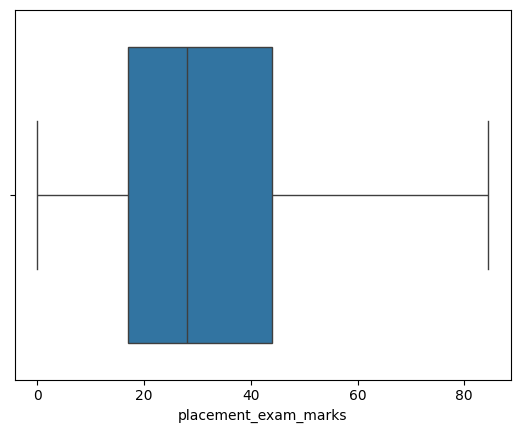

In [63]:
sns.boxplot(x=df['placement_exam_marks'])